In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [134]:
file_path = "dataset/schizo_symptons.csv"  
df = pd.read_csv(file_path)
print(df.head())

                    Name  Age  Gender Marital_Status   Fatigue   Slowing  \
0         Leslie Goodwin   68  Female         Single  0.698075  0.123064   
1     Dr. Troy Castaneda   88    Male        Married  0.049245 -0.042080   
2          Chelsey Allen   67  Female        Married  0.651995  0.187117   
3  Dr. Devin Skinner DVM   95  Female        Widowed  0.036324  0.580808   
4           Megan Mendez   81  Female        Widowed  0.926727  0.484202   

       Pain   Hygiene  Movement       Schizophrenia  
0  0.375303  0.234639  0.251869  Elevated Proneness  
1  0.432807  0.501238  0.379948  Moderate Proneness  
2       NaN  0.301942  0.302588  Elevated Proneness  
3  0.005356  0.306968  0.813618  Moderate Proneness  
4  0.702405  0.736054  0.579448      High Proneness  


https://www.kaggle.com/datasets/shree23yaa/schizophrenia-symptoms

**Fitur-fitur pada dataset**

In [135]:
print("Informasi Dataset:")
print(df.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            5000 non-null   object 
 1   Age             5000 non-null   int64  
 2   Gender          5000 non-null   object 
 3   Marital_Status  5000 non-null   object 
 4   Fatigue         4756 non-null   float64
 5   Slowing         4771 non-null   float64
 6   Pain            4758 non-null   float64
 7   Hygiene         5000 non-null   float64
 8   Movement        5000 non-null   float64
 9   Schizophrenia   5000 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 390.8+ KB
None


In [136]:
print("\nPreview Dataset:")
print(df.head())


Preview Dataset:
                    Name  Age  Gender Marital_Status   Fatigue   Slowing  \
0         Leslie Goodwin   68  Female         Single  0.698075  0.123064   
1     Dr. Troy Castaneda   88    Male        Married  0.049245 -0.042080   
2          Chelsey Allen   67  Female        Married  0.651995  0.187117   
3  Dr. Devin Skinner DVM   95  Female        Widowed  0.036324  0.580808   
4           Megan Mendez   81  Female        Widowed  0.926727  0.484202   

       Pain   Hygiene  Movement       Schizophrenia  
0  0.375303  0.234639  0.251869  Elevated Proneness  
1  0.432807  0.501238  0.379948  Moderate Proneness  
2       NaN  0.301942  0.302588  Elevated Proneness  
3  0.005356  0.306968  0.813618  Moderate Proneness  
4  0.702405  0.736054  0.579448      High Proneness  


**Fitur Target**

fitur target : Diagnosis

In [137]:
#cek kolom yg mengandung kata diagnosis atau label
possible_targets = [col for col in df.columns if 'diagnosis' in col.lower() or 'label' in col.lower() or 'schizo' in col.lower()] 
# jika kolom mengandung kata diagnosis atau label, maka dijadikan target atau -> masuk dalam list possible_targets
feature_target = possible_targets[0] if possible_targets else None #jika ada maka diambil indeks 0, jika tidak ada maka None
# jika kolom tidak mengandung diagnosis atau label maka masuk ke dalam list feature_variables
feature_variables = [col for col in df.columns if col != feature_target]

print("\nFitur Target:", feature_target)
print("Fitur Variabel Bebas:", feature_variables)


Fitur Target: Schizophrenia
Fitur Variabel Bebas: ['Name', 'Age', 'Gender', 'Marital_Status', 'Fatigue', 'Slowing', 'Pain', 'Hygiene', 'Movement']


**Jenis Fitur**

In [138]:
# cek jika data bertipe objek, maka dimasukan ke dalam list categorical_features
categorical_features = [col for col in df.columns if df[col].dtype == 'object']
# cek jika data bertipe int64 atau float64, maka dimasukan ke dalam list numerical_features
numerical_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

print("\nFitur Kategorikal:", categorical_features)
print("Fitur Numerik:", numerical_features)


Fitur Kategorikal: ['Name', 'Gender', 'Marital_Status', 'Schizophrenia']
Fitur Numerik: ['Age', 'Fatigue', 'Slowing', 'Pain', 'Hygiene', 'Movement']


**Label Kategori**

In [139]:
df['Schizophrenia'].unique()

array(['Elevated Proneness', 'Moderate Proneness', 'High Proneness',
       'Low Proneness', 'Very High Proneness'], dtype=object)

**Rentang nilai setiap fitur**

In [140]:
print("\nRentang Nilai Fitur:")
print(df.describe())


Rentang Nilai Fitur:
              Age      Fatigue      Slowing         Pain      Hygiene  \
count  5000.00000  4756.000000  4771.000000  4758.000000  5000.000000   
mean     74.83340     0.503835     0.499524     0.499612     0.499717   
std       9.57787     0.296123     0.295365     0.294886     0.294907   
min      55.00000    -0.095115    -0.094843    -0.095771    -0.094284   
25%      67.00000     0.247056     0.245795     0.251174     0.248998   
50%      75.00000     0.506278     0.502403     0.498051     0.501223   
75%      83.00000     0.759499     0.744812     0.749946     0.751029   
max      95.00000     1.091136     1.092146     1.090027     1.086922   

          Movement  
count  5000.000000  
mean      0.499952  
std       0.289860  
min      -0.089272  
25%       0.254143  
50%       0.503340  
75%       0.741253  
max       1.088914  


**Encode Data**

In [141]:
df.head(20)

,Name,Age,Gender,Marital_Status,Fatigue,Slowing,Pain,Hygiene,Movement,Schizophrenia
0,Leslie Goodwin,68,Female,Single,0.698075,0.123064,0.375303,0.234639,0.251869,Elevated Proneness
1,Dr. Troy Castaneda,88,Male,Married,0.049245,-0.042080,0.432807,0.501238,0.379948,Moderate Proneness
2,Chelsey Allen,67,Female,Married,0.651995,0.187117,NaN,0.301942,0.302588,Elevated Proneness
3,Dr. Devin Skinner DVM,95,Female,Widowed,0.036324,0.580808,0.005356,0.306968,0.813618,Moderate Proneness
4,Megan Mendez,81,Female,Widowed,0.926727,0.484202,0.702405,0.736054,0.579448,High Proneness
5,Zachary Smith DVM,77,Male,Married,0.145541,0.737656,0.369630,0.206471,0.890684,Elevated Proneness
6,Aimee Carpenter,62,Male,Widowed,0.482457,0.204313,-0.037966,-0.020695,0.567918,Moderate Proneness
7,Elizabeth Freeman,87,Male,Married,NaN,0.684888,0.406424,0.080857,0.480542,Moderate Proneness
8,Brian Hudson,86,Male,Single,0.751227,0.965047,0.619223,0.747749,0.517518,High Proneness
9,Kelsey Ward,88,Male,Married,0.345959,0.775604,0.251332,0.594027,0.749919,Elevated Proneness


In [142]:
from sklearn.preprocessing import LabelEncoder
# ubah kolom categorical menjadi numerik

le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])  # Male=1, Female=0

le_marital = LabelEncoder()
df['Marital_Status'] = le_marital.fit_transform(df['Marital_Status'])

# le_target = LabelEncoder()
# df['Schizophrenia'] = le_target.fit_transform(df['Schizophrenia'])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            5000 non-null   object 
 1   Age             5000 non-null   int64  
 2   Gender          5000 non-null   int32  
 3   Marital_Status  5000 non-null   int32  
 4   Fatigue         4756 non-null   float64
 5   Slowing         4771 non-null   float64
 6   Pain            4758 non-null   float64
 7   Hygiene         5000 non-null   float64
 8   Movement        5000 non-null   float64
 9   Schizophrenia   5000 non-null   object 
dtypes: float64(5), int32(2), int64(1), object(2)
memory usage: 351.7+ KB
None


- female:0, male:1
- divorced:0, married:1, single:2, widowed:3 

In [143]:
df.head(20)

,Name,Age,Gender,Marital_Status,Fatigue,Slowing,Pain,Hygiene,Movement,Schizophrenia
0,Leslie Goodwin,68,0,2,0.698075,0.123064,0.375303,0.234639,0.251869,Elevated Proneness
1,Dr. Troy Castaneda,88,1,1,0.049245,-0.042080,0.432807,0.501238,0.379948,Moderate Proneness
2,Chelsey Allen,67,0,1,0.651995,0.187117,NaN,0.301942,0.302588,Elevated Proneness
3,Dr. Devin Skinner DVM,95,0,3,0.036324,0.580808,0.005356,0.306968,0.813618,Moderate Proneness
4,Megan Mendez,81,0,3,0.926727,0.484202,0.702405,0.736054,0.579448,High Proneness
5,Zachary Smith DVM,77,1,1,0.145541,0.737656,0.369630,0.206471,0.890684,Elevated Proneness
6,Aimee Carpenter,62,1,3,0.482457,0.204313,-0.037966,-0.020695,0.567918,Moderate Proneness
7,Elizabeth Freeman,87,1,1,NaN,0.684888,0.406424,0.080857,0.480542,Moderate Proneness
8,Brian Hudson,86,1,2,0.751227,0.965047,0.619223,0.747749,0.517518,High Proneness
9,Kelsey Ward,88,1,1,0.345959,0.775604,0.251332,0.594027,0.749919,Elevated Proneness


**Cek Missing Value**

In [144]:
# cek data null
print("\nJumlah Data Null per Fitur:")
print(df.isnull().sum()) #menghitung jumlah data null per fitur


Jumlah Data Null per Fitur:
Name                0
Age                 0
Gender              0
Marital_Status      0
Fatigue           244
Slowing           229
Pain              242
Hygiene             0
Movement            0
Schizophrenia       0
dtype: int64


In [145]:
print(df.notnull().sum())

Name              5000
Age               5000
Gender            5000
Marital_Status    5000
Fatigue           4756
Slowing           4771
Pain              4758
Hygiene           5000
Movement          5000
Schizophrenia     5000
dtype: int64


**Cek Duplikasi**

In [146]:
# cek data duplikat
print("\nJumlah Data Duplikat:", df.duplicated().sum())


Jumlah Data Duplikat: 0


**Hapus Missing Value dan Duplikat Value**

In [147]:
df = df.dropna(axis=0)
df = df.drop_duplicates()

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4318 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            4318 non-null   object 
 1   Age             4318 non-null   int64  
 2   Gender          4318 non-null   int32  
 3   Marital_Status  4318 non-null   int32  
 4   Fatigue         4318 non-null   float64
 5   Slowing         4318 non-null   float64
 6   Pain            4318 non-null   float64
 7   Hygiene         4318 non-null   float64
 8   Movement        4318 non-null   float64
 9   Schizophrenia   4318 non-null   object 
dtypes: float64(5), int32(2), int64(1), object(2)
memory usage: 337.3+ KB
None


**transformasi data -> (tidak perlu)**

**Normalisasi Data**

karna memiliki skala yang berbeda antar fitur

In [148]:
# # variabel menampung normalisasi data
# scaler = StandardScaler()
# # menyalin data
# df_normalized = df.copy()
# # menentukan skala normalisasi dan ubah data dalam rentang 0-1
# df_normalized[numerical_features] = scaler.fit_transform(df[numerical_features])

# print("\nData setelah Normalisasi (contoh 5 baris pertama):")
# print(df_normalized.head())

In [149]:
print(df[numerical_features].describe())

               Age      Fatigue      Slowing         Pain      Hygiene  \
count  4318.000000  4318.000000  4318.000000  4318.000000  4318.000000   
mean     74.779064     0.503396     0.499663     0.500529     0.501483   
std       9.561927     0.296260     0.294848     0.294170     0.294218   
min      55.000000    -0.092667    -0.094843    -0.095771    -0.094284   
25%      67.000000     0.246073     0.249073     0.253225     0.252167   
50%      75.000000     0.507387     0.500709     0.498417     0.503413   
75%      83.000000     0.758491     0.744854     0.749884     0.751913   
max      95.000000     1.091136     1.092146     1.090027     1.086922   

          Movement  
count  4318.000000  
mean      0.503044  
std       0.288767  
min      -0.089272  
25%       0.259898  
50%       0.507957  
75%       0.743620  
max       1.077088  


**Cek Outlier**

In [150]:
# hitung kuartil 1 dari data numerik
Q1 = df[numerical_features].quantile(0.25)
# hitung kuartil 3 dari data numerik
Q3 = df[numerical_features].quantile(0.75)
# hitung Interquartile Range (IQR)
IQR = Q3 - Q1
# hitung jumlah outlier per fitur 
outliers = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | #jika nilai lbh rendah dari batas bawah(outlier rendah)
            (df[numerical_features] > (Q3 + 1.5 * IQR))) #jika nilai lbh besar dari batas atas(outlier tinggi)

print("\nJumlah Outlier per Fitur:")
print(outliers.sum()) # total outlier per fitur


Jumlah Outlier per Fitur:
Age         0
Fatigue     0
Slowing     0
Pain        0
Hygiene     0
Movement    0
dtype: int64


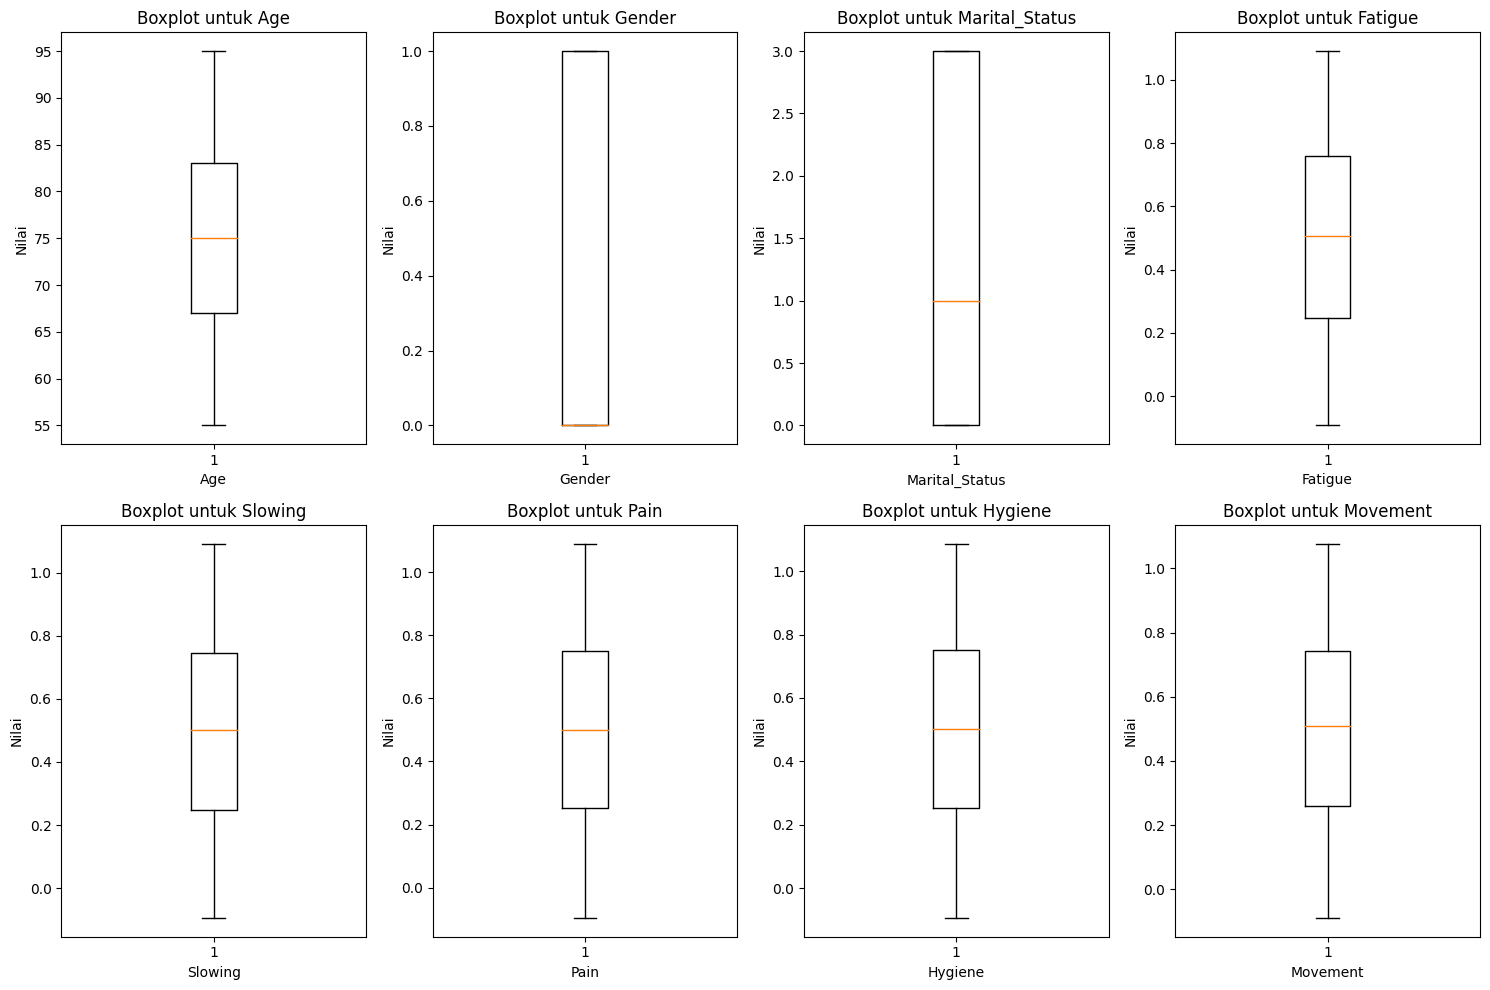

In [151]:
kolomNumerik = df.select_dtypes(include=['number']).columns

fig = plt.figure(figsize=(15, 10))
position = 1

for i, col in enumerate(kolomNumerik):
    plt.subplot(2, 4, position)
    plt.title(f'Boxplot untuk {col}')
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel('Nilai')
    position += 1  

plt.tight_layout()
plt.show()

tidak ada teknik ekstraksi fitur karna tidak ada data teks yang digunakan

In [152]:
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
Index: 4318 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            4318 non-null   object 
 1   Age             4318 non-null   int64  
 2   Gender          4318 non-null   int32  
 3   Marital_Status  4318 non-null   int32  
 4   Fatigue         4318 non-null   float64
 5   Slowing         4318 non-null   float64
 6   Pain            4318 non-null   float64
 7   Hygiene         4318 non-null   float64
 8   Movement        4318 non-null   float64
 9   Schizophrenia   4318 non-null   object 
dtypes: float64(5), int32(2), int64(1), object(2)
memory usage: 337.3+ KB


,Name,Age,Gender,Marital_Status,Fatigue,Slowing,Pain,Hygiene,Movement,Schizophrenia
0,Leslie Goodwin,68,0,2,0.698075,0.123064,0.375303,0.234639,0.251869,Elevated Proneness
1,Dr. Troy Castaneda,88,1,1,0.049245,-0.042080,0.432807,0.501238,0.379948,Moderate Proneness
3,Dr. Devin Skinner DVM,95,0,3,0.036324,0.580808,0.005356,0.306968,0.813618,Moderate Proneness
4,Megan Mendez,81,0,3,0.926727,0.484202,0.702405,0.736054,0.579448,High Proneness
5,Zachary Smith DVM,77,1,1,0.145541,0.737656,0.369630,0.206471,0.890684,Elevated Proneness
6,Aimee Carpenter,62,1,3,0.482457,0.204313,-0.037966,-0.020695,0.567918,Moderate Proneness
8,Brian Hudson,86,1,2,0.751227,0.965047,0.619223,0.747749,0.517518,High Proneness
9,Kelsey Ward,88,1,1,0.345959,0.775604,0.251332,0.594027,0.749919,Elevated Proneness
10,Sharon Benson,85,1,3,0.415945,0.474850,0.611756,0.957820,0.093992,Elevated Proneness
11,Jessica Mills,59,1,1,-0.035303,0.152712,0.174523,0.797200,0.191662,Moderate Proneness


**Export Data**

In [153]:
df.to_excel("dataset/schizo_symptons_cleaned.xlsx", index=False)

In [155]:
# kalau mau drop kolom nama ini di ka atasin 1 cell
df.drop(columns=['Name'], inplace=True)